## Анализ гипотез для интернет-магазина

**Описание исследования:**  
Заказчик - крупный интернет-магазин. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Наша задача - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.  
  
**Исходные данные:**  
  
*Данные для первой части:*  
  
Файл /datasets/hypothesis.csv.  
  - Hypothesis — краткое описание гипотезы;  
  - Reach — охват пользователей по 10-балльной шкале;  
  - Impact — влияние на пользователей по 10-балльной шкале;  
  - Confidence — уверенность в гипотезе по 10-балльной шкале;  
  - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
  
*Данные для второй части:*  
  
Файл /datasets/orders.csv.   
  - transactionId — идентификатор заказа;  
  - visitorId — идентификатор пользователя, совершившего заказ;  
  - date — дата, когда был совершён заказ;  
  - revenue — выручка заказа;  
  - group — группа A/B-теста, в которую попал заказ.  
  
Файл /datasets/visitors.csv.  
  - date — дата;  
  - group — группа A/B-теста;  
  - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Шаг 1. Изучение и предобработка данных

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [43]:
pd.options.display.max_colwidth = 110

try:
    hypothesis = pd.read_csv(r"D:\Yandex\Module2\4\project\hypothesis.csv")
except:
    hypothesis = pd.read_csv("/datasets/hypothesis.csv")
    
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [44]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [45]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

В датасете hypothesis для названий стобцов был поставлен нижний регистр. По типам данных все в порядке.

In [46]:
try:
    orders = pd.read_csv(r"D:\Yandex\Module2\4\project\orders.csv")
except:
    orders = pd.read_csv("/datasets/orders.csv")

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [48]:
orders = orders.rename(
    columns={
        'transactionId': 'transaction_id', 
        'visitorId': 'visitor_id'
    }
)

orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Также, для orders 2 столбца приведены к более "питоновскому" виду.

In [49]:
orders['date'] = pd.to_datetime(orders['date'])

#проверка на тип данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Был изменен тип данных на datetime для столбца с датой.

In [50]:
try:
    visitors = pd.read_csv(r"D:\Yandex\Module2\4\project\visitors.csv")
except:
    visitors = pd.read_csv("/datasets/visitors.csv")

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [51]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [52]:
visitors['date'] = pd.to_datetime(visitors['date'])

#проверка на тип данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Для visitors также изменен тип данных на datetime в столбце, показывающего дату.  
Во всех трех датасетах пропусков не обнаружено.

In [53]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Явных дубликатов не обнаружено, проверим, есть ли пользователи, которые попали в обе группы.

In [54]:
orders.groupby('visitor_id').agg({'group': 'nunique'}).sort_values(by='group', ascending=False)
orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group == 2').count()

group    58
dtype: int64

Заметим, что есть пользователи, которые попали в обе группы. Необходимо это учесть в дальнейшем. Данные изучены и подготовлены для анализа.

## Шаг 2. Приоритизация гипотез.

**Применяем фреймворк *ICE* для приоритизации гипотез:**

In [55]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 1)

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


В результате приоритизации лучший результат показала гипотеза 8: *"Запустить акцию, дающую скидку на товар в день рождения"*. Далее идут гипотеза 0: *"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"* и гипотеза 7: *"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"*.

**Применяем фреймворк *RICE* для приоритизации гипотез:**

In [56]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 1)

display(hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


Применив фреймворк RICE мы добавили в расчет новый показатель Reach (Охват). В результате наиболее привлекательной гипотезой стала №7: *"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"*. Логично, что охват пользователей в таком случае будет максимальным.  
На втором месте гипотеза 2: *"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"*. Rice score этой гипотезы ниже в 2 раза, чем у лидирующей 7-й гипотезы.  
Третье место занимают гипотезы 0: *"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"* и 6: *"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"*. Их RICE равны, однако первая гипотеза сильно больше повлияет на пользователей, когда вторая имеет больший охват и ее реализация потребует меньше затрат.  
Гипотеза 8, лидирующая по показателю ICE, оказалась на 5-м месте, т.к. ее охват минимален.  

Хотелось бы заметить, что набор гипотез, находящихся в первой пятерке по ICE, остался тот же, но изменились их места приоритета. При этом эти гипотезы лидируют по Сonfidence (оценены на 7-9), т.е. мы уверены в этих гипотезах, что их изменения повлияют на пользователей именно так, как задумано.

## Шаг 3. Анализ A/B-теста.

In [57]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [58]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим, могли ли в данных оказаться пользователи, попавшие в обе группы теста.

In [59]:
wrong_users = orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group == 2')
print('Кол-во пользователей, попавших в обе группы теста:', wrong_users['group'].count())

# оставляем только "корректных" пользователей
orders = orders.query('~visitor_id.isin(@wrong_users.index)')

# проверка
print('Кол-во пользователей, попавших в обе группы теста после чистки:', 
      orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group == 2')['group'].count()
     )

orders.info()

Кол-во пользователей, попавших в обе группы теста: 58
Кол-во пользователей, попавших в обе группы теста после чистки: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Целых 58 пользователей попало в обе группы теста, учитывать их было бы некорректно для чистоты эксперимента. После чистки данных, удалилась 181 строка из orders.

**Построим график кумулятивной выручки по группам:**

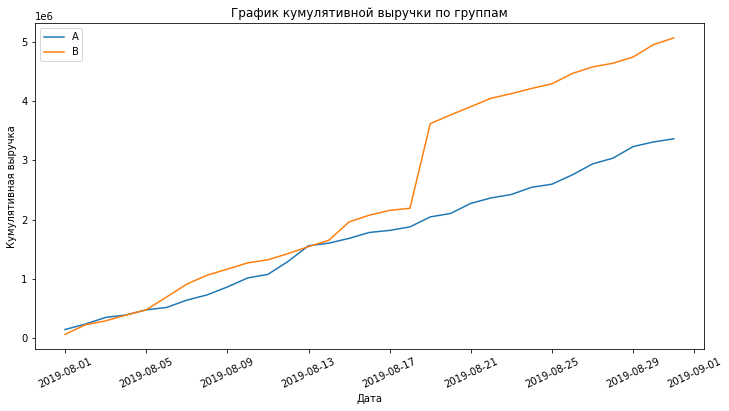

In [60]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

# агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# аналогично для посетителей
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# переименовывем столбцы
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

# графики
plt.figure(figsize=(12, 6))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=25)
plt.legend()

Практически с самого начала теста, группа B лидирует по кумулятивной выручке. Однако, мы можем заметить, что после середины теста, график резко пошел вверх. Возможно, это связано с выбросами, с заказами, которые имеют высокую стоимость, а судя по графику очень высокую стоимость. Видимо, они и повлияли на результаты, в дальнейшем, необходимо проверить такие аномалии.

**Построим график кумулятивного среднего чека по группам:**

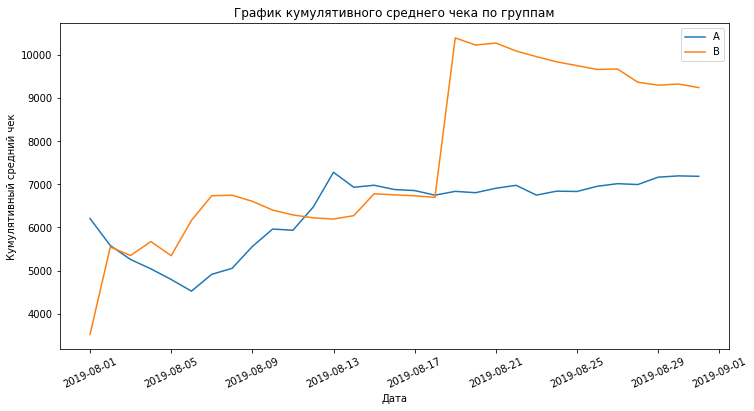

In [61]:
plt.figure(figsize=(12, 6))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=25)
plt.legend() 

После середины периода имеется резкое увеличение среднего чека для группы B. Это также подтверждает версию о том, что в данные попали аномалии, искажающие данные.  
При этом можно сказать, что группа A стабилизировалась по среднему чеку на 7000-х и перестала сильно колебаться, как в начале теста.  
Согласно графика, в группе B идет падение среднего чека, но этому предшествовал резкий скачок вверх. Т.е. допустим, если один заказ с высокой стоимостью повысил средний чек, то остальные заказы, имеющие стоимость ниже, будут понижать средний чек, т.к. не достают до "планки", установленной каким-либо выбросом. Поэтому тяжело сейчас сказать, стабилизировался ли график среднего чека в группе B.

**Построим график относительного изменения кумулятивного среднего чека:**

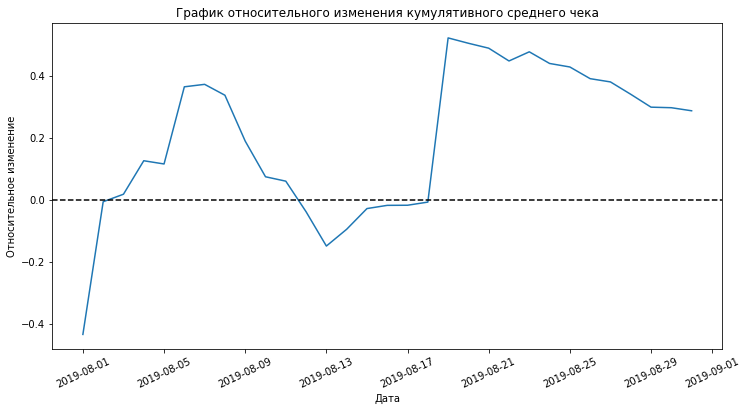

In [62]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / 
         (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA']) - 1
        )

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=25)
plt.axhline(y=0, color='black', linestyle='--') 

Опять же, график можно разделить на 2 части, первая левая, это начало теста, где данные еще колеблются и средний чек преобладает то у одной группы, то у другой. Правая часть характеризуется резким скачком группы B и последующим доминированием над группой A.

**Построим график кумулятивного среднего количества заказов на посетителя по группам:**

(18109.0, 18140.0, 0.0, 0.05)

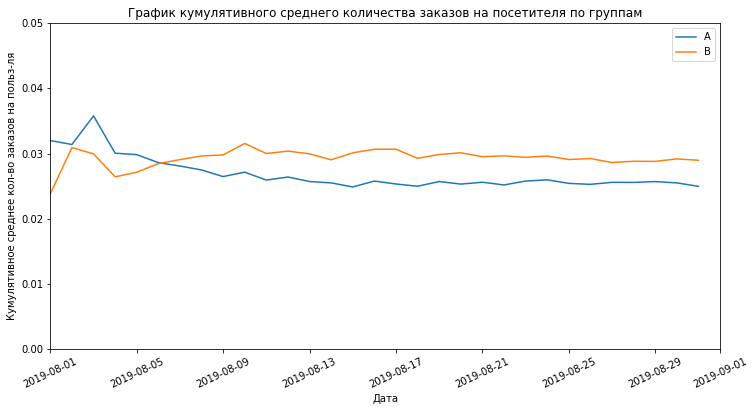

In [63]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# графики
plt.figure(figsize=(12, 6))

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')

plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее кол-во заказов на польз-ля')
plt.xticks(rotation=25)
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

Сначала группа A имела большее среднее кол-во заказов на пользователя, чем группа B. Однако, затем значения установились, у группы B около 0.03, у группы A около 0.025.

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

(18109.0, 18140.0, -0.5, 0.5)

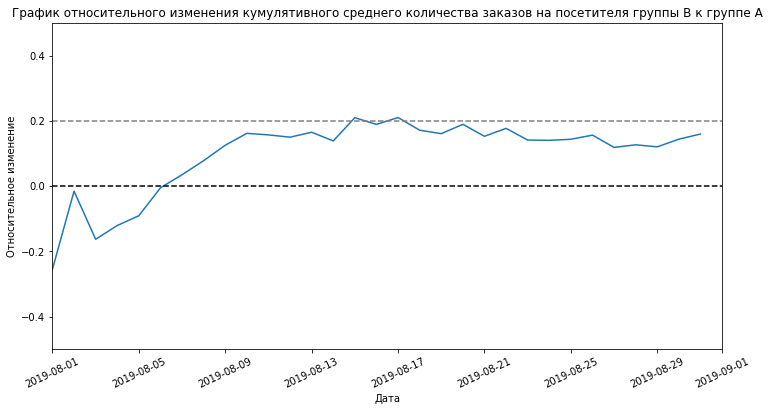

In [64]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(
    cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1
        )

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=25)

plt.axhline(y=0, color='black', linestyle='--')

plt.axhline(y=0.2, color='grey', linestyle='--')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5])

Можно наблюдать, что ближе к середине теста график устанавливается, а относительный прирост группы B к группе A равен 10-20%. Редкие выбросы со сверхвысокой стоимостью практически не влияют на показатель среднего кол-ва заказов на польз-ля, однако необходимо проверить, возможно, есть клиенты, оформившие большое количество заказов и их поведение отличается от нормального среднестатистического.

**Построим точечный график количества заказов по пользователям:**

In [65]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

orders_by_users.columns = ['user_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Максимально большое количество заказов, который делал пользователь - это 3. Это совсем немного, при том, что мы имеем данные за месяц. Посмотрим далее, насколько часто пользователи делают 3 заказа.

Text(0, 0.5, 'Кол-во заказов')

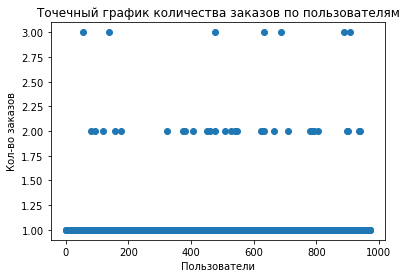

In [66]:
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')

Всего 7 человек из почти 1000 пользователей делали по 3 заказа, немного больше клиентов по 2 заказа. Возможно, 3 заказа - это действительно аномально. Посчитаем перцентили для дальнейших выводов.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:**

In [26]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей делали более 1 заказа, не более 1% оформляли больше 2-х. Думаю, что будет разумно отсеять пользователей с 3-мя заказами, или 1% от всех пользователей.

**Построим точечный график стоимостей заказов:**

Text(0, 0.5, 'Стоимость заказа')

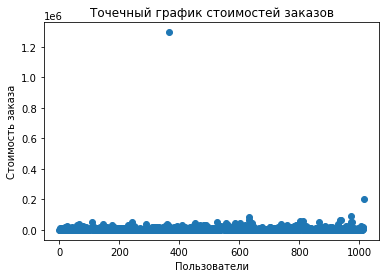

In [67]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')

Кажется, мы нашли тот самый выброс, из-за которого сильно увеличились показатели кумулятивных выручки и среднего чека в группе B. Этот заказ со стоимостью более 1.2 млн, есть еще выброс на 200 тыс., но сейчас по точечному графику не видно, что происходит с остальными заказами со стоимостью менее 100 тыс. Рассмотрим их распределение более детально.

Text(0, 0.5, 'Стоимость заказа')

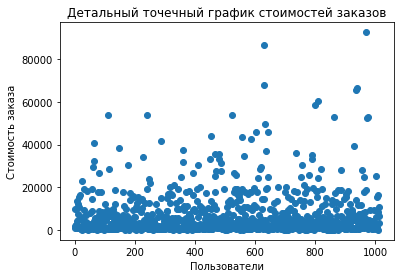

In [68]:
# ограничим ось Y, рассмотрим стоимости менее 200 тыс.
x_values = pd.Series(range(0, len(orders['revenue']) - 2))

plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'])

plt.title('Детальный точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')

На детальном графике мы видим, что тут также присутствуют выбросы, пусть и не так сильно выделяющиеся. Необходим расчет перцентилей.

**Посчитаем 95-й и 99-й перцентили стоимости заказов:**

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 1% пользователей оформляло заказы свыше 53904, и не более 5% - стоимостью более 26785. Полагаю, что оптимальным решением будет определить границу аномальных заказов равную 30 тыс. Таким образом мы удалим менее 5% пользователей со сверхвысокими стоимостями заказов.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

In [30]:
# количество пользователей в выбранную дату в группе A
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

# количество пользователей до выбранной даты включительно в группе A
visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

# количество пользователей в выбранную дату в группе B
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

# количество пользователей до выбранной даты включительно в группе B
visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

# количество заказов в выбранную дату в группе A
# суммарная выручка в выбранную дату в группе A
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

# суммарное число заказов до выбранной даты включительно в группе A
# суммарная выручка до выбранной даты включительно в группе A
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

# количество заказов в выбранную дату в группе B
# суммарная выручка в выбранную дату в группе B
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

# суммарное количество заказов до выбранной даты включительно в группе B
# суммарная выручка до выбранной даты включительно в группе B
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Сформулируем гипотезы.  
*Нулевая:* различий в среднем количестве заказов между группами нет.  
*Альтернативная:* различия в среднем между группами есть.

In [31]:
# заказы, совершенные пользователем в группе A
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']

# заказы, совершенные пользователем в группе A
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders'] 

# подготовка выборок
sampleA = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() 
                    - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum()
                    - len(orders_by_users_B['orders'])), name='orders')],axis=0) 

# тест Манна-Уитни
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в среднем между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительное различие в среднем между группами: 0.160


Применив тест Манна-Уитни, мы получили p-value = 0.011, это меньше 0.05, поэтому отвергаем нулевую гипотезу. Это означает, что различия в среднем количестве заказов на посетителя между группами есть. Относительный прирост среднего группы B к среднему группы A равен 16%. Далее мы проведем тест после удаления аномальных пользователей.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:**

Сформулируем гипотезы.  
*Нулевая:* различий в среднем чеке заказа между группами нет.  
*Альтернативная:* различия в среднем чеке между группами есть.

In [32]:
# тест Манна-Уитни
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))

print('Относительное различие в среднем чеке между группами:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1)
     )

p-value: 0.829
Относительное различие в среднем чеке между группами: 0.287


P-value больше 0.05, поэтому мы не отвергаем нулевую гипотезу о том, что различий в среднем чеке заказа между группами нет. При этом, относительный прирост среднего чека в группе B к среднему чеку группы A равен 28.7%, и, как мы наблюдаем, такая разница в среднем чеке не является значимой.  
В дальнейшем, мы посчитаем статистическую значимость уже для "очищенных" данных.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

In [33]:
# срез пользователей с числом заказов больше 2
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

# срез пользователей со стоимостью больше 30000
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormal_users.head())
display(abnormal_users.shape[0])

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitor_id, dtype: int64

49

Ранее мы определили границы для аномальных пользователей. Мы удаляем клиентов с 3-мя заказами и пользователей с заказами со стоимостями более 30000. Таким образом, мы удалили 49 пользователей из данных.  
Сформулируем гипотезы для "очищенных" данных.  
*Нулевая:* различий в среднем количестве заказов между группами нет.  
*Альтернативная:* различия в среднем между группами есть.

In [34]:
# очищенные данные о заказах в группе A
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# очищенные данные о заказах в группе B
sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print('Относительное различие в среднем между группами:', 
      '{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)
     ) 

p-value: 0.00971
Относительное различие в среднем между группами: 0.187


P-value практически не изменился, мы также отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет. При этом после "чистки" прирост среднего группы B увеличился до 18.7%

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:**

Сформулируем гипотезы для "очищенных" данных.  
*Нулевая:* различий в среднем чеке заказа между группами нет.  
*Альтернативная:* различия в среднем чеке между группами есть.

In [35]:
print(
    'p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие в среднем чеке между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.741
Относительное различие в среднем чеке между группами: -0.027


P-value уменьшился, но все еще гораздо больше 0.05. Получается, что результаты тестов не изменились. Зато после "очищения" нет прироста группы B, даже, наоборот, небольшой относительный прирост появился у группы А к группе В, он равен 2.7%

В результате мы располагаем такой информацией: присутствуют статистически значимые различия между группами в среднем количестве заказов на пользователя. Группа B относительно группы A имеет прирост в 16% по "сырым" данным и 18.7% после фильтрации. Нет статистически значимых различий в среднем чеке между группами. После фильтрации группа A относительно группы B имеет небольшой прирост 2.7%. Графики различий среднего количества заказов и среднего чека показали нам, что данные установились у определенных значений. Ввиду этого, продолжать тест нет смысла. Можно заметить, что небольшое отставание группы B по среднему чеку легко перекрывается относительным приростом в 16-19% по конверсии, т.е. кол-во заказов в группе B больше, а т.к. перед нами стояла задача увеличить выручку интернет-магазина, то поэтому рекомендуется остановить тест и зафиксировать победу группы B.

## Финальный вывод

Наше исследование должно помочь интернет-магазину увеличить свою выручку. Для этого совместно с отделом маркетинга был подготовлен список из 9 гипотез. В результате приоритизации гипотез было выяснено следующее:
  - при использовании фреймворка ICE самой приоритетной стала гипотеза №8 о предоставлении скидки на товар в день рождения
  - при использовании фреймворка RICE самой приоритетной стала гипотеза №7 о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
  - в обоих фреймворках первые 5 гипотез одни и те же, отличаются их места. Помимо ранее упомянутых, в списке присутствуют гипотеза №0 о добавлении двух новых каналов привлечения трафика, гипотеза №2 о добавлении блоков рекомендаций товаров на сайт интернет-магазина, гипотеза №6 о показах на главной странице баннеров с актуальными акциями и распродажами
  - первые 5 гипотез имеют отличительное свойство, у них всех высокие оценки по параметру Сonfidence (Уверенность в их срабатывании)  
  
*Рекомендации:*  
  - т.к. показатель Reach очень важен, то применять фреймворк RICE для приоритизации гипотез
  - в первую очередь проверить гипотезу №7, далее гипотезу №2 и потом гипотезы №0 и №6
  - по возможности, составить и приоритизировать аналогично новые гипотезы 
  
Был проведен A/B-тест и получены такие результаты:
  - часть пользователей попала в обе группы теста, что может означать его некорректное проведение
  - статистически значимых различий в среднем чеке между группами нет, как для "сырых" данных, так и после фильтрации
  - по "сырым" данным средний чек группы B имеет прирост относительно группы А 28.7%, на это сильно повлияли аномальные данные
  - после фильтрации группа A относительно группы B имеет небольшой прирост 2.7%
  - присутствуют статистически значимые различия между группами в среднем количестве заказов на пользователя
  - группа B относительно группы A имеет прирост в 16% по "сырым" данным и 18.7% после фильтрации
  - графики различий среднего количества заказов и среднего чека указывают на то, что данные установились у определенных значений  
  
*Рекомендации:*  
  - остановить тест
  - зафиксировать победу группы B
  - разобраться, по какой причине некоторые пользователи попали в обе группы теста